In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [3]:
import sklearn


In [4]:
from sklearn.preprocessing import MinMaxScaler

In [6]:
data = pd.read_csv('/content/sample_data/GOOG.csv', date_parser = True)
data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
4266,2021-08-02,2709.689941,2720.409912,2693.389893,2719.790039,2719.790039,1007000
4267,2021-08-03,2720.000000,2726.709961,2683.669922,2725.600098,2725.600098,953200
4268,2021-08-04,2724.989990,2730.760010,2708.300049,2720.570068,2720.570068,826400
4269,2021-08-05,2720.570068,2739.000000,2712.000000,2738.800049,2738.800049,593300
4270,2021-08-06,2725.899902,2741.601074,2720.929932,2740.719971,2740.719971,678000


In [7]:
data_training = data[data['Date']<'2019-01-01'].copy()
data_test = data[data['Date']>='2019-01-01'].copy()

In [8]:
data_training = data_training.drop(['Date', 'Adj Close'], axis = 1)

In [9]:
scaler = MinMaxScaler()
data_training = scaler.fit_transform(data_training)
data_training

array([[7.42148227e-04, 2.98909923e-03, 6.47716504e-04, 3.39307537e-03,
        2.77885876e-01],
       [4.71386886e-03, 4.78092896e-03, 4.19769536e-03, 3.83867225e-03,
        2.22151352e-01],
       [4.91367646e-03, 4.01532941e-03, 1.92238659e-03, 1.98679178e-03,
        1.85522815e-01],
       ...,
       [7.92197108e-01, 8.11970141e-01, 7.89936884e-01, 8.15799920e-01,
        2.54669035e-02],
       [8.18777193e-01, 8.21510648e-01, 8.20026849e-01, 8.10219301e-01,
        1.70461017e-02],
       [8.19874096e-01, 8.19172449e-01, 8.12100139e-01, 8.09012935e-01,
        1.79972283e-02]])

In [10]:
X_train = []
y_train = []

for i in range(60, data_training.shape[0]):
    X_train.append(data_training[i-60:i])
    y_train.append(data_training[i, 0])
    
X_train, y_train = np.array(X_train), np.array(y_train)

In [11]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

In [12]:
regressor = Sequential()

regressor.add(LSTM(units = 60, activation = 'relu', return_sequences = True, input_shape = (X_train.shape[1], 5)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 120, activation = 'relu'))
regressor.add(Dropout(0.2))

regressor.add(Dense(units = 1))

In [13]:
regressor.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 60, 60)            15840     
_________________________________________________________________
dropout (Dropout)            (None, 60, 60)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 60, 60)            29040     
_________________________________________________________________
dropout_1 (Dropout)          (None, 60, 60)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 60, 80)            45120     
_________________________________________________________________
dropout_2 (Dropout)          (None, 60, 80)            0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 120)               9

In [16]:
regressor.compile(optimizer='adam', loss = 'mean_squared_error')
regressor.fit(X_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
112/112 [==============================] - 49s 163ms/step - loss: 0.0014
Epoch 2/10
112/112 [==============================] - 18s 163ms/step - loss: 0.0013
Epoch 3/10
112/112 [==============================] - 18s 163ms/step - loss: 0.0011
Epoch 4/10
112/112 [==============================] - 18s 162ms/step - loss: 0.0012
Epoch 5/10
112/112 [==============================] - 18s 164ms/step - loss: 0.0012
Epoch 6/10
112/112 [==============================] - 18s 164ms/step - loss: 0.0010
Epoch 7/10
112/112 [==============================] - 18s 163ms/step - loss: 9.4321e-04
Epoch 8/10
112/112 [==============================] - 18s 163ms/step - loss: 0.0010
Epoch 9/10
112/112 [==============================] - 18s 162ms/step - loss: 9.6105e-04
Epoch 10/10
112/112 [==============================] - 18s 164ms/step - loss: 0.0011


In [19]:
past_60_days = data_test.tail(60)

In [20]:
df = past_60_days.append(data_test, ignore_index = True)
df = df.drop(['Date', 'Adj Close'], axis = 1)
df.head()

,Open,High,Low,Close,Volume
0,2261.090088,2276.601074,2242.719971,2261.969971,1333500
1,2291.830078,2321.139893,2283.320068,2316.159912,1331200
2,2309.320068,2323.340088,2295.000000,2321.409912,992100
3,2336.906006,2343.149902,2303.159912,2303.429932,865100
4,2264.399902,2316.760010,2263.520020,2308.709961,967500


In [21]:
inputs = scaler.transform(df)
inputs

array([[1.81049282, 1.81973748, 1.82826637, 1.81545382, 0.01606105],
       [1.83565674, 1.8561489 , 1.86210727, 1.85992606, 0.01603318],
       [1.84997413, 1.85794761, 1.87184269, 1.8642346 , 0.01192456],
       ...,
       [2.19024366, 2.191022  , 2.21633555, 2.19181468, 0.00991689],
       [2.18662549, 2.19775837, 2.21941952, 2.20677553, 0.00709259],
       [2.19098852, 2.1998848 , 2.22686278, 2.20835116, 0.00811884]])

In [22]:
X_test = []
y_test = []

for i in range(60, inputs.shape[0]):
    X_test.append(inputs[i-60:i])
    y_test.append(inputs[i, 0])

X_test, y_test = np.array(X_test), np.array(y_test)
X_test.shape, y_test.shape

((655, 60, 5), (655,))

In [23]:
y_pred = regressor.predict(X_test)

In [24]:
scaler.scale_

array([8.18605127e-04, 8.17521128e-04, 8.33517573e-04, 8.20673293e-04,
       1.21162615e-08])

In [25]:
scale = 1/8.18605127e-04
y_pred = y_pred*scale
y_test = y_test*scale

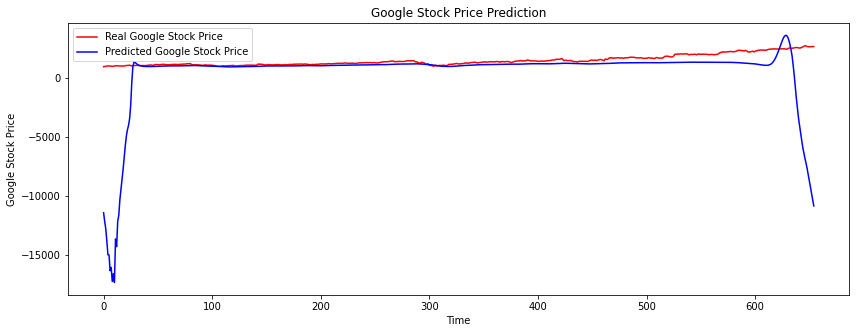

In [26]:
# Visualising the results
plt.figure(figsize=(14,5))
plt.plot(y_test, color = 'red', label = 'Real Google Stock Price')
plt.plot(y_pred, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()